# Deep Learning Methods

## Clone the repo

In [2]:
!rm -rf dl-projects
!git clone https://github.com/mengwangk/dl-projects
!cd dl-projects && ls 

Cloning into 'dl-projects'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 211 (delta 101), reused 129 (delta 41), pack-reused 0
Receiving objects: 100% (211/211), 7.89 MiB | 8.78 MiB/s, done.
Resolving deltas: 100% (101/101), done.
backup	       lstm_s2.ipynb  number_download.ipynb  README.md
datasets       lstm_s3.ipynb  number_features.ipynb  scraper
featurelib     lstm_s4.ipynb  number_train_dl.bak    stock.ipynb
LICENSE        lstm_s5.ipynb  number_train_dl.ipynb
lstm_s1.ipynb  lstm_s6.ipynb  number_train_ml.ipynb


## Magic

In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import featuretools as ft
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
from fastai.basics import *
from fastai.tabular import *

## Setup

In [0]:
# to make this notebook's output stable across runs
np.random.seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from IPython.display import display
pd.options.display.max_columns = 50
pd.options.display.html.table_schema = True

In [0]:
from pathlib import Path

DATASET = Path("dl-projects/datasets/lotto/data_processed.csv")

## Load Data

In [0]:
# Read into data frame
dataset = pd.read_csv(DATASET, header=0, sep=',', quotechar='"', parse_dates=['DrawDate'], dtype={'PrizeType': str})

In [0]:
df = dataset.copy()

In [10]:
df.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,DaysSinceLastExactMatch,DaysUntilNextExactMatch,DaysSinceLastAnyMatch,DaysUntilNextAnyMatch,1st_digit,2nd_digit,3rd_digit,4th_digit,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,CumProbaExactMatch,CumProbaAnyMatch,0_1,0_2,0_3,0_4,0_5,...,pos_2_5_freq,pos_2_6_freq,pos_2_7_freq,pos_2_8_freq,pos_2_9_freq,pos_3_0_freq,pos_3_1_freq,pos_3_2_freq,pos_3_3_freq,pos_3_4_freq,pos_3_5_freq,pos_3_6_freq,pos_3_7_freq,pos_3_8_freq,pos_3_9_freq,pos_4_0_freq,pos_4_1_freq,pos_4_2_freq,pos_4_3_freq,pos_4_4_freq,pos_4_5_freq,pos_4_6_freq,pos_4_7_freq,pos_4_8_freq,pos_4_9_freq
104663,495819,2019-06-09,SpecialNo1,9569,705,0,95,0,9,5,6,9,2019,6,23,9,6,160,0.12,1.31,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104664,495819,2019-06-09,SpecialNo10,6223,735,0,25,0,6,2,2,3,2019,6,23,9,6,160,0.06,1.17,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104665,495819,2019-06-09,SpecialNo2,791,613,0,28,0,0,7,9,1,2019,6,23,9,6,160,0.11,2.56,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104666,495819,2019-06-09,SpecialNo3,1218,1628,0,147,0,1,2,1,8,2019,6,23,9,6,160,0.07,1.38,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104667,495819,2019-06-09,SpecialNo4,3669,14,0,14,0,3,6,6,9,2019,6,23,9,6,160,0.12,1.33,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104668,495819,2019-06-09,SpecialNo5,9517,603,0,7,0,9,5,1,7,2019,6,23,9,6,160,0.14,2.25,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104669,495819,2019-06-09,SpecialNo6,1844,1187,0,15,0,1,8,4,4,2019,6,23,9,6,160,0.11,1.46,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104670,495819,2019-06-09,SpecialNo7,5050,120,0,120,0,5,0,5,0,2019,6,23,9,6,160,0.07,0.49,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104671,495819,2019-06-09,SpecialNo8,9073,592,0,0,0,9,0,7,3,2019,6,23,9,6,160,0.14,2.64,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276
104672,495819,2019-06-09,SpecialNo9,2976,2066,0,39,0,2,9,7,6,2019,6,23,9,6,160,0.08,2.32,11063,10908,11165,10946,10857,...,10285,10525,10372,10431,10275,10499,10741,10491,10574,10504,10284,10524,10372,10431,10276,10498,10740,10493,10575,10504,10282,10524,10372,10432,10276


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104673 entries, 0 to 104672
Columns: 115 entries, DrawNo to pos_4_9_freq
dtypes: datetime64[ns](1), float64(2), int64(111), object(1)
memory usage: 91.8+ MB


In [0]:
# [col for col in df.columns]
columns = ['DrawNo',
 'DrawDate',
 'PrizeType',
 'LuckyNo',
 'DaysSinceLastExactMatch',
 'DaysUntilNextExactMatch',
 'DaysSinceLastAnyMatch',
 'DaysUntilNextAnyMatch',
 '1st_digit',
 '2nd_digit',
 '3rd_digit',
 '4th_digit',
 'DrawYear',
 'DrawMonth',
 'DrawWeek',
 'DrawDay',
 'DrawDayofweek',
 'DrawDayofyear',
 'CumProbaExactMatch',
 'CumProbaAnyMatch',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '0_6',
 '0_7',
 '0_8',
 '0_9',
 '1_2',
 '1_3',
 '1_4',
 '1_5',
 '1_6',
 '1_7',
 '1_8',
 '1_9',
 '2_3',
 '2_4',
 '2_5',
 '2_6',
 '2_7',
 '2_8',
 '2_9',
 '3_4',
 '3_5',
 '3_6',
 '3_7',
 '3_8',
 '3_9',
 '4_5',
 '4_6',
 '4_7',
 '4_8',
 '4_9',
 '5_6',
 '5_7',
 '5_8',
 '5_9',
 '6_7',
 '6_8',
 '6_9',
 '7_8',
 '7_9',
 '8_9',
 '0_0',
 '1_1',
 '2_2',
 '3_3',
 '4_4',
 '5_5',
 '6_6',
 '7_7',
 '8_8',
 '9_9',
 'pos_1_0_freq',
 'pos_1_1_freq',
 'pos_1_2_freq',
 'pos_1_3_freq',
 'pos_1_4_freq',
 'pos_1_5_freq',
 'pos_1_6_freq',
 'pos_1_7_freq',
 'pos_1_8_freq',
 'pos_1_9_freq',
 'pos_2_0_freq',
 'pos_2_1_freq',
 'pos_2_2_freq',
 'pos_2_3_freq',
 'pos_2_4_freq',
 'pos_2_5_freq',
 'pos_2_6_freq',
 'pos_2_7_freq',
 'pos_2_8_freq',
 'pos_2_9_freq',
 'pos_3_0_freq',
 'pos_3_1_freq',
 'pos_3_2_freq',
 'pos_3_3_freq',
 'pos_3_4_freq',
 'pos_3_5_freq',
 'pos_3_6_freq',
 'pos_3_7_freq',
 'pos_3_8_freq',
 'pos_3_9_freq',
 'pos_4_0_freq',
 'pos_4_1_freq',
 'pos_4_2_freq',
 'pos_4_3_freq',
 'pos_4_4_freq',
 'pos_4_5_freq',
 'pos_4_6_freq',
 'pos_4_7_freq',
 'pos_4_8_freq',
 'pos_4_9_freq']

### Train and Validation Split

In [13]:
n = len(df); n

104673

In [0]:
dep_var="LuckyNo"

In [16]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X[dep_var]; 
print(len(X))
print(len(y))

104673
104673


In [17]:
X.drop([dep_var], inplace=True, axis=1)
X.head(1)

,DrawNo,DrawDate,PrizeType,DaysSinceLastExactMatch,DaysUntilNextExactMatch,DaysSinceLastAnyMatch,DaysUntilNextAnyMatch,1st_digit,2nd_digit,3rd_digit,4th_digit,DrawYear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DrawDayofyear,CumProbaExactMatch,CumProbaAnyMatch,0_1,0_2,0_3,0_4,0_5,0_6,...,pos_2_5_freq,pos_2_6_freq,pos_2_7_freq,pos_2_8_freq,pos_2_9_freq,pos_3_0_freq,pos_3_1_freq,pos_3_2_freq,pos_3_3_freq,pos_3_4_freq,pos_3_5_freq,pos_3_6_freq,pos_3_7_freq,pos_3_8_freq,pos_3_9_freq,pos_4_0_freq,pos_4_1_freq,pos_4_2_freq,pos_4_3_freq,pos_4_4_freq,pos_4_5_freq,pos_4_6_freq,pos_4_7_freq,pos_4_8_freq,pos_4_9_freq
0,40792,1992-05-06,1stPrizeNo,0,28,0,28,0,0,1,9,1992,5,19,6,2,127,0.01,0.01,3,1,1,3,4,3,...,3,4,5,2,4,8,8,4,4,3,5,3,7,2,2,5,8,2,2,5,5,5,6,2,6


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
print(len(X_train)); print(len(X_test)); print(len(y_train)); print(len(y_test))

73271
31402
73271
31402


### Assignment

In [0]:
train_dataset = df

## Preparing full data set

### Shuffle

In [0]:
# from sklearn.utils import shuffle
# df = shuffle(df)

In [22]:
n = len(df)
print(n)
print(n/23)
print(df['DrawDate'].min())
print(df['DrawDate'].max())


split_percent = 0.75
idx = n * split_percent
print(idx)
idx = int(idx // 23 * 23)
print(idx)

train_df = df[:idx]
test_df = df[idx:]

print(len(train_df), train_df.DrawDate.min(), train_df.DrawDate.max())
print(len(test_df), test_df.DrawDate.min(), test_df.DrawDate.max())
print(len(train_df) + len(test_df))

104673
4551.0
1992-05-06 00:00:00
2019-06-09 00:00:00
78504.75
78499
78499 1992-05-06 00:00:00 2013-01-12 00:00:00
26174 2013-01-13 00:00:00 2019-06-09 00:00:00
104673


In [23]:
train_df.head().T.head(120)

,0,1,2,3,4
DrawNo,40792,40792,40792,40792,40792
DrawDate,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00,1992-05-06 00:00:00
PrizeType,1stPrizeNo,2ndPrizeNo,3rdPrizeNo,ConsolationNo1,ConsolationNo10
LuckyNo,19,1124,592,5311,407
DaysSinceLastExactMatch,0,0,0,0,0
DaysUntilNextExactMatch,28,2436,25,515,2114
DaysSinceLastAnyMatch,0,0,0,0,0
DaysUntilNextAnyMatch,28,162,11,204,22
1st_digit,0,1,0,5,0
2nd_digit,0,1,5,3,4


In [24]:
test_df.head().T.head(120)

,78499,78500,78501,78502,78503
DrawNo,382113,382113,382113,382113,382113
DrawDate,2013-01-13 00:00:00,2013-01-13 00:00:00,2013-01-13 00:00:00,2013-01-13 00:00:00,2013-01-13 00:00:00
PrizeType,1stPrizeNo,2ndPrizeNo,3rdPrizeNo,ConsolationNo1,ConsolationNo10
LuckyNo,9580,565,9124,8802,1922
DaysSinceLastExactMatch,249,3221,469,344,578
DaysUntilNextExactMatch,308,119,672,1445,1750
DaysSinceLastAnyMatch,75,43,7,57,7
DaysUntilNextAnyMatch,14,28,42,55,42
1st_digit,9,0,9,8,1
2nd_digit,5,5,1,8,9


In [0]:
# Data normalization proceses
procs=[FillMissing, Categorify, Normalize]

In [0]:
# Set continuous and categorical columns
cont_vars = [
 'DaysSinceLastExactMatch',
 'DaysUntilNextExactMatch',
 'DaysSinceLastAnyMatch',
 'DaysUntilNextAnyMatch',
 'CumProbaExactMatch',
 'CumProbaAnyMatch',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '0_6',
 '0_7',
 '0_8',
 '0_9',
 '1_2',
 '1_3',
 '1_4',
 '1_5',
 '1_6',
 '1_7',
 '1_8',
 '1_9',
 '2_3',
 '2_4',
 '2_5',
 '2_6',
 '2_7',
 '2_8',
 '2_9',
 '3_4',
 '3_5',
 '3_6',
 '3_7',
 '3_8',
 '3_9',
 '4_5',
 '4_6',
 '4_7',
 '4_8',
 '4_9',
 '5_6',
 '5_7',
 '5_8',
 '5_9',
 '6_7',
 '6_8',
 '6_9',
 '7_8',
 '7_9',
 '8_9',
 '0_0',
 '1_1',
 '2_2',
 '3_3',
 '4_4',
 '5_5',
 '6_6',
 '7_7',
 '8_8',
 '9_9',
 'pos_1_0_freq',
 'pos_1_1_freq',
 'pos_1_2_freq',
 'pos_1_3_freq',
 'pos_1_4_freq',
 'pos_1_5_freq',
 'pos_1_6_freq',
 'pos_1_7_freq',
 'pos_1_8_freq',
 'pos_1_9_freq',
 'pos_2_0_freq',
 'pos_2_1_freq',
 'pos_2_2_freq',
 'pos_2_3_freq',
 'pos_2_4_freq',
 'pos_2_5_freq',
 'pos_2_6_freq',
 'pos_2_7_freq',
 'pos_2_8_freq',
 'pos_2_9_freq',
 'pos_3_0_freq',
 'pos_3_1_freq',
 'pos_3_2_freq',
 'pos_3_3_freq',
 'pos_3_4_freq',
 'pos_3_5_freq',
 'pos_3_6_freq',
 'pos_3_7_freq',
 'pos_3_8_freq',
 'pos_3_9_freq',
 'pos_4_0_freq',
 'pos_4_1_freq',
 'pos_4_2_freq',
 'pos_4_3_freq',
 'pos_4_4_freq',
 'pos_4_5_freq',
 'pos_4_6_freq',
 'pos_4_7_freq',
 'pos_4_8_freq',
 'pos_4_9_freq']

cat_vars = ['PrizeType', 'DrawDayofyear', "DrawMonth", "DrawWeek", "DrawDay", "DrawDayofweek"]

In [0]:
dep_var = 'LuckyNo'

In [0]:
df_joined = train_df[cat_vars + cont_vars + [dep_var,'DrawDate']].copy()

In [29]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78499 entries, 0 to 78498
Columns: 109 entries, PrizeType to DrawDate
dtypes: datetime64[ns](1), float64(2), int64(105), object(1)
memory usage: 65.3+ MB


In [0]:
train_df = train_df[cat_vars + cont_vars + [dep_var,'DrawDate']].copy()
test_df = test_df[cat_vars + cont_vars + [dep_var,'DrawDate']].copy()

In [31]:
len(train_df), len(test_df)

(78499, 26174)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78499 entries, 0 to 78498
Columns: 109 entries, PrizeType to DrawDate
dtypes: datetime64[ns](1), float64(2), int64(105), object(1)
memory usage: 65.3+ MB


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 78499 to 104672
Columns: 109 entries, PrizeType to DrawDate
dtypes: datetime64[ns](1), float64(2), int64(105), object(1)
memory usage: 21.8+ MB


In [36]:
# Min and max draw date
test_df['DrawDate'].min(), test_df['DrawDate'].max()

(Timestamp('2013-01-13 00:00:00'), Timestamp('2019-06-09 00:00:00'))

### Create a validation set

In [39]:
# 1st criteria - of the same date
# 2nd criteria - >= len(test_df)

cut = train_df['DrawDate'][(train_df['DrawDate'] == train_df['DrawDate'][len(test_df) * 2.5])].index.max()
print(cut)

65457


In [40]:
train_df.head(5)

,PrizeType,DrawDayofyear,DrawMonth,DrawWeek,DrawDay,DrawDayofweek,DaysSinceLastExactMatch,DaysUntilNextExactMatch,DaysSinceLastAnyMatch,DaysUntilNextAnyMatch,CumProbaExactMatch,CumProbaAnyMatch,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,1_2,1_3,1_4,1_5,...,pos_2_7_freq,pos_2_8_freq,pos_2_9_freq,pos_3_0_freq,pos_3_1_freq,pos_3_2_freq,pos_3_3_freq,pos_3_4_freq,pos_3_5_freq,pos_3_6_freq,pos_3_7_freq,pos_3_8_freq,pos_3_9_freq,pos_4_0_freq,pos_4_1_freq,pos_4_2_freq,pos_4_3_freq,pos_4_4_freq,pos_4_5_freq,pos_4_6_freq,pos_4_7_freq,pos_4_8_freq,pos_4_9_freq,LuckyNo,DrawDate
0,1stPrizeNo,127,5,19,6,2,0,28,0,28,0.01,0.01,3,1,1,3,4,3,1,0,5,3,4,4,2,...,5,2,4,8,8,4,4,3,5,3,7,2,2,5,8,2,2,5,5,5,6,2,6,19,1992-05-06
1,2ndPrizeNo,127,5,19,6,2,0,2436,0,162,0.01,0.01,3,1,1,3,4,3,1,0,5,3,4,4,2,...,5,2,4,8,8,4,4,3,5,3,7,2,2,5,8,2,2,5,5,5,6,2,6,1124,1992-05-06
2,3rdPrizeNo,127,5,19,6,2,0,25,0,11,0.01,0.01,3,1,1,3,4,3,1,0,5,3,4,4,2,...,5,2,4,8,8,4,4,3,5,3,7,2,2,5,8,2,2,5,5,5,6,2,6,592,1992-05-06
3,ConsolationNo1,127,5,19,6,2,0,515,0,204,0.01,0.01,3,1,1,3,4,3,1,0,5,3,4,4,2,...,5,2,4,8,8,4,4,3,5,3,7,2,2,5,8,2,2,5,5,5,6,2,6,5311,1992-05-06
4,ConsolationNo10,127,5,19,6,2,0,2114,0,22,0.01,0.01,3,1,1,3,4,3,1,0,5,3,4,4,2,...,5,2,4,8,8,4,4,3,5,3,7,2,2,5,8,2,2,5,5,5,6,2,6,407,1992-05-06


In [42]:
train_df['DrawDate'][(train_df['DrawDate'] == train_df['DrawDate'][len(test_df) * 2.5])].tail(10)

65448   2009-11-01
65449   2009-11-01
65450   2009-11-01
65451   2009-11-01
65452   2009-11-01
65453   2009-11-01
65454   2009-11-01
65455   2009-11-01
65456   2009-11-01
65457   2009-11-01
Name: DrawDate, dtype: datetime64[ns]

In [43]:
valid_idx = range(cut)
print(valid_idx)

range(0, 65457)


In [0]:
# train_idx = len(train_df) - cut
# valid_idx = range(train_idx + 1, train_idx + cut)
# train_idx = range(train_idx)
# print(train_idx)
# print(valid_idx)

In [45]:
len(df_joined)

78499

## Train

In [0]:
path = Path('dl-projects/datasets/lotto')

In [0]:
data = (TabularList.from_df(df_joined, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())
# FloatList?
# CategoryList?

In [48]:
data

TabularDataBunch;

Train: LabelList (13042 items)
x: TabularList
PrizeType SpecialNo9; DrawDayofyear 305; DrawMonth 11; DrawWeek 44; DrawDay 1; DrawDayofweek 6; DaysSinceLastExactMatch 1.1824; DaysUntilNextExactMatch 0.3910; DaysSinceLastAnyMatch -0.5718; DaysUntilNextAnyMatch -0.3569; CumProbaExactMatch -0.8164; CumProbaAnyMatch 0.6704; 0_1 -1.7200; 0_2 -1.6447; 0_3 -1.7218; 0_4 -1.7210; 0_5 -1.6608; 0_6 -1.6872; 0_7 -1.7161; 0_8 -1.7154; 0_9 -1.7043; 1_2 -1.6850; 1_3 -1.7354; 1_4 -1.7643; 1_5 -1.7180; 1_6 -1.6485; 1_7 -1.7382; 1_8 -1.7213; 1_9 -1.6800; 2_3 -1.7620; 2_4 -1.7396; 2_5 -1.7189; 2_6 -1.6740; 2_7 -1.7046; 2_8 -1.7573; 2_9 -1.6926; 3_4 -1.7511; 3_5 -1.7481; 3_6 -1.7061; 3_7 -1.7476; 3_8 -1.7636; 3_9 -1.7250; 4_5 -1.8100; 4_6 -1.7313; 4_7 -1.7641; 4_8 -1.7593; 4_9 -1.7670; 5_6 -1.7223; 5_7 -1.7866; 5_8 -1.7266; 5_9 -1.7009; 6_7 -1.7801; 6_8 -1.7163; 6_9 -1.7626; 7_8 -1.7620; 7_9 -1.7643; 8_9 -1.7390; 0_0 -1.6424; 1_1 -1.7507; 2_2 -1.7143; 3_3 -1.7596; 4_4 -1.8627; 5_5 -1.747

### Model

In [49]:
print(np.max(train_df[dep_var]))
print(np.log(np.max(train_df[dep_var])))
max_log_y = np.log(np.max(train_df[dep_var]) * 1.0)
y_range = torch.tensor([0, max_log_y], device=defaults.device)
print(max_log_y, y_range)
print(y_range.dtype)

#y_range = torch.tensor([0, 9999], dtype=torch.long, device=defaults.device)
#print(y_range)

9999
9.21024036697585
9.21024036697585 tensor([0.0000, 9.2102], device='cuda:0')
torch.float32


In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        #y_range=y_range, metrics=accuracy)                        
                        y_range=y_range, metrics=exp_rmspe)

In [0]:
# doc(tabular_learner)

In [52]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 9)
    (1): Embedding(366, 44)
    (2): Embedding(13, 7)
    (3): Embedding(54, 15)
    (4): Embedding(32, 11)
    (5): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(101, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=191, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=500, out_features=1, bias=True)
  )
)

In [53]:
len(data.train_ds.cont_names)

101

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


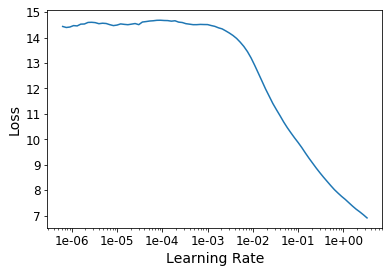

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(2, 1e-03, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,2.110122,inf,inf,00:11
1,0.999822,inf,inf,00:11


In [0]:
learn.save('1')

In [58]:
learn.recorder.plot_losses(last=-1)

TypeError: ignored